In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_path = '/content/gdrive/MyDrive/KHT/2023/Dataset/'

import os
data_paths = [data_path + '/' + i for i in os.listdir(data_path) if i.endswith('xlsx')]
data_paths.sort()
data_paths

['/content/gdrive/MyDrive/KHT/2023/Dataset//Chain-of-thought_en.xlsx',
 '/content/gdrive/MyDrive/KHT/2023/Dataset//Chain-of-thought_vn.xlsx',
 '/content/gdrive/MyDrive/KHT/2023/Dataset//few_shot_en.xlsx',
 '/content/gdrive/MyDrive/KHT/2023/Dataset//few_shot_vn.xlsx',
 '/content/gdrive/MyDrive/KHT/2023/Dataset//zero_shot_en.xlsx',
 '/content/gdrive/MyDrive/KHT/2023/Dataset//zero_shot_vn.xlsx']

In [ ]:
transform_dict = {
    'negative': 0,
    'neutral': 1,
    'positive': 2
}

In [ ]:
translate_dict = {
    'tiêu cực': 'negative',
    'tích cực': 'positive',
    'trung tính': 'neutral',
    'trung lập': 'neutral'
}

In [ ]:
def extract_output(sent):
    sent = sent.lower()

    sent = sent.replace("đầu ra", "output")
    sent = sent.replace("kết quả cuối cùng", "output")
    sent = sent.replace("kết quả", "output")

    # print(sent)

    sent = sent.split("output:")[-1].strip()
    if '[' in sent:
        sent = sent[1:-1]

    if "\n\n" in sent:
        sent = sent.split('\n\n')[0]

    sent = sent.replace('[', '').replace(']', '')
    sent = translate_dict.get(sent, sent).strip()

    return transform_dict[sent]

In [ ]:
import pandas as pd

data = {}

for path in data_paths:
    print(path)
    name_file = '.'.join(path.split("/")[-1].split('.')[:-1])
    data[name_file] = [extract_output(i) for i in pd.read_excel(path).gpt.astype(str).tolist()]

/content/gdrive/MyDrive/KHT/2023/Dataset//Chain-of-thought_en.xlsx
/content/gdrive/MyDrive/KHT/2023/Dataset//Chain-of-thought_vn.xlsx
/content/gdrive/MyDrive/KHT/2023/Dataset//few_shot_en.xlsx
/content/gdrive/MyDrive/KHT/2023/Dataset//few_shot_vn.xlsx
/content/gdrive/MyDrive/KHT/2023/Dataset//zero_shot_en.xlsx
/content/gdrive/MyDrive/KHT/2023/Dataset//zero_shot_vn.xlsx


In [ ]:
for key, obj in data.items():
    print(key)
    print(len(obj))
    print(set(obj))
    print()

Chain-of-thought_en
192
{0, 1, 2}

Chain-of-thought_vn
192
{0, 1, 2}

few_shot_en
192
{0, 1, 2}

few_shot_vn
192
{0, 1, 2}

zero_shot_en
192
{0, 1, 2}

zero_shot_vn
192
{0, 1, 2}



In [ ]:
example = [
    'Sản phẩm dùng cho em bé nhưng không hề dịu nhẹ',
    'Bên trong balo thì bị rách k biết là kiểu nó z hay là do bên giao hàng balo cứng k mềm như mik tưởng mong shop cải thiện lại balo nhưng với giá như vậy cũng gọi là ổn mng nên thử',
    'đã mua lần 2 bên shop sp có mùi thơm dễ chịu công dụng cũng tuyệt nữa',
    'Sau vài lần dùng thử mình đành để làm nước giặt',
    'Mặc dù đóng gói kỹ nhưng vẫn bị bóp méo và rỉ ra 1 ít trong quá trình vận chuyển nhưng mùi thơm quá nên bỏ qua 3',
    'chuẩn chính hãng mùi thơm tắm gội nhiều bọt chai dược gói cẩn thận có tem niêm phong',
]

In [ ]:
pd.read_csv('/content/gdrive/MyDrive/KHT/2023/data.csv')

,domain,review,star,label
0,Baby,Sản phẩm dùng cho em bé nhưng không hề dịu nhẹ,1,Negative
1,Baby,Sau vài lần dùng thử mình đành để làm nước giặt,1,Negative
2,Baby,shiper giao hàng mặt khó tính sản phẩm giao bị...,3,Negative
3,Baby,đã mua lần 2 bên shop sp có mùi thơm dễ chịu c...,5,Positive
4,Baby,chuẩn chính hãng mùi thơm tắm gội nhiều bọt ch...,5,Positive
...,...,...,...,...
195,Clothes,Sản phẩm tốt hình ảnh chỉ mang tính chất e làm...,5,Positive
196,Clothes,Giao hàng nhanh quần hơi dài so với mk nhưng r...,3,Positive
197,Clothes,Quần đẹp khỏi chê luôn cầm quần đầm tay lắm qu...,5,Positive
198,Clothes,Ổn mang đi làm ok so với giá tiền vậy ổn rồi r...,5,Positive


In [ ]:
eval_label = pd.read_csv('/content/gdrive/MyDrive/KHT/2023/data.csv').label.astype(str).apply(lambda x: x.lower()).tolist()
eval_sent = pd.read_csv('/content/gdrive/MyDrive/KHT/2023/data.csv').review.astype(str).tolist()
eval_domain = pd.read_csv('/content/gdrive/MyDrive/KHT/2023/data.csv').domain.astype(str).tolist()

eval = [transform_dict[label.lower()] for label, sent in zip(eval_label, eval_sent) if sent not in example]
eval_sent_f = [sent for label, sent in zip(eval_label, eval_sent) if sent not in example]
eval_domain_f = [domain for domain, sent in zip(eval_domain, eval_sent) if sent not in example]

eval[:5]

[0, 2, 2, 2, 1]

In [ ]:
from sklearn.metrics import classification_report

score_dict = {}
for key, obj in data.items():
    print(key)
    report = classification_report(eval, obj, digits = 4)
    print(report)
    # score_dict[key] = report['accuracy']


# sort_by_value = dict(sorted(score_dict.items(), key=lambda item: item[1], reverse=True))
# sort_by_value

Chain-of-thought_en
              precision    recall  f1-score   support

           0     0.7901    0.8205    0.8050        78
           1     0.4884    0.5526    0.5185        38
           2     0.8529    0.7632    0.8056        76

    accuracy                         0.7448       192
   macro avg     0.7105    0.7121    0.7097       192
weighted avg     0.7553    0.7448    0.7485       192

Chain-of-thought_vn
              precision    recall  f1-score   support

           0     0.7973    0.7564    0.7763        78
           1     0.3226    0.7895    0.4580        38
           2     1.0000    0.3289    0.4950        76

    accuracy                         0.5938       192
   macro avg     0.7066    0.6249    0.5765       192
weighted avg     0.7836    0.5938    0.6020       192

few_shot_en
              precision    recall  f1-score   support

           0     0.8205    0.8205    0.8205        78
           1     0.4600    0.6053    0.5227        38
           2     0.8906

In [ ]:
!pip install mlxtend

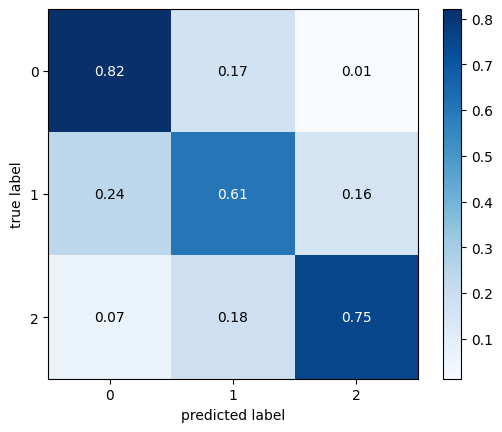

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(eval, data['few_shot_en']),
                                colorbar=True,
                                show_absolute=False,
                                show_normed=True,)
                                # class_names=['Negative', 'Neutral', 'Positive'])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.evaluate import confusion_matrix

def plot_confusion_matrix(confusion_matrix, labels, title, ax, set_y = True, set_x = True, set_title = True):
    normalized_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

    sns.set(font_scale=1.6)

    cbar = True
    if i < 2:
      cbar = False

    sns.heatmap(normalized_matrix, annot=True, fmt=".2f", cmap="YlGn", cbar=False,
              xticklabels=labels, yticklabels=labels, ax=ax)

    if set_y:
        ax.set_ylabel("True Label", labelpad = 20, fontsize = 20)

    if set_x:
        ax.set_xlabel("Predicted Label", labelpad = 20)

    if set_title:
        ax.set_title(title, pad = 30)

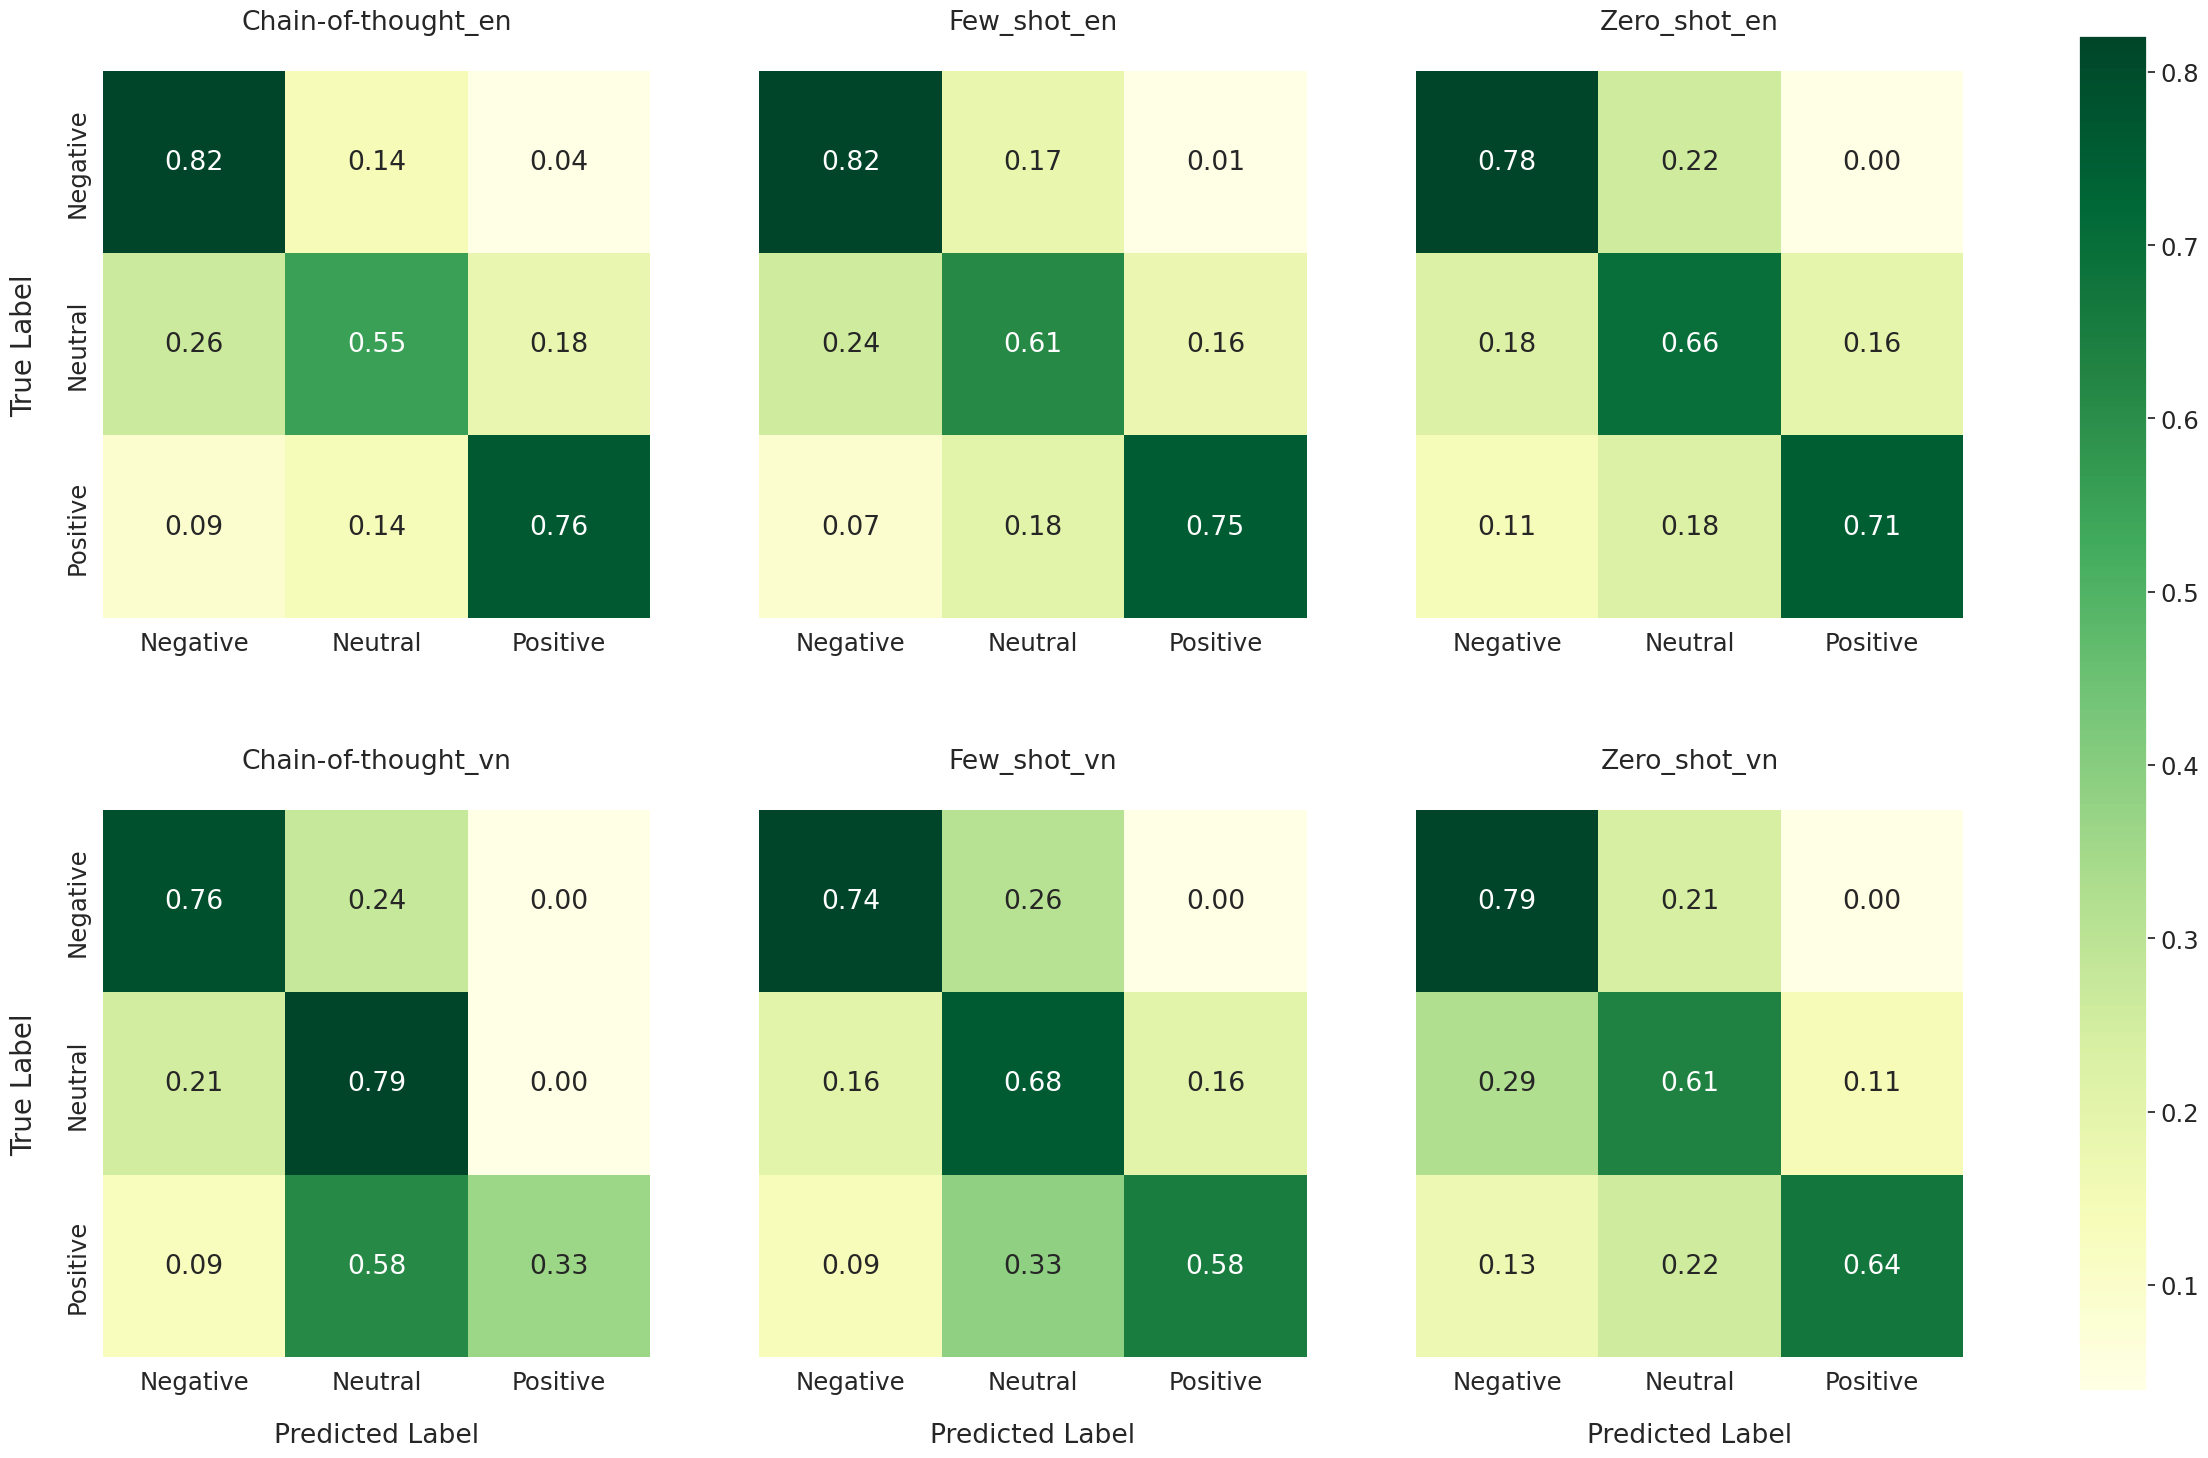

<Figure size 640x480 with 0 Axes>

In [ ]:
cm_data = {key:confusion_matrix(eval, obj) for key, obj in data.items()}

row_size = 2
fig, axes = plt.subplots(row_size, len(cm_data.items())//row_size, figsize=(len(cm_data.items())//row_size * 10, 8 * (row_size + 0.2)), sharey=True)

for row in axes:
    if row_size > 1:
        for col in row:
            col.set_aspect('equal')  # Set aspect ratio to ensure equal cell sizes
    else:
        row.set_aspect('equal')

# axes[1].set_aspect('equal')
# axes[2].set_aspect('equal')

for i, (key, cm) in enumerate(cm_data.items()):
#   type_data = type_data.replace("_", " ").title()

    plot_confusion_matrix(cm, ['Negative', 'Neutral', 'Positive'], key.capitalize(), axes[i%2][i//2], set_x = i%2, set_y = not(i//2))

fig.colorbar(axes[0][0].collections[0], ax=axes, shrink = 1)
# fig.set_size_inches(len(cm_data) * 10 * 5, 8 * 5)
plt.show()
plt.savefig(data_path + "confusion_matrices.pdf", format='pdf', dpi = 300)

In [ ]:
for idx, (i, j) in enumerate(zip(data['Chain-of-thought_vn'], eval)):
    if i != j:
        print(idx)
        print(i, j)
        print(eval_sent_f[idx])
        print(eval_domain_f[idx])
        print()

5
1 0
Về mở thấy bị đổ cả ra hộp phải mang đi rửa may chưa vỡ
Baby

6
1 2
chất lượng thì dùng mới biết đc quét mã thì thấy sp chính hãng
Baby

8
1 2
sản phẩm rất tốt gian hàng chính hãng dùng rất yên tâm mọi thứ đều ok
Baby

12
1 2
Nên mua ạ chất lượng rất rất là tuyệt zời luôn nha dùng thích ơi là thích í ko mua hơi phí nha
Baby

15
1 0
Giao nhầm thì mình có thể thông cảm vì bán hàng nhầm lẫn có thể bỏ qua
Baby

16
0 1
Mong shop có nhìu chtr km hơn mình mua gói jumbo mà k có quà tặng
Baby

17
1 2
Thấy mọi người khen nên mua dùng thử tạm thời mình chỉ đánh giá đc thế thôi mã vạch là 49 nên thấy cũng an tâm hơn
Baby

20
1 0
Khi nào gửi bù sản phẩm đến mik sẽ sửa đánh giá lại
Baby

21
1 2
Hộp không có dấu hiệu bị móp chứng tỏ bộ phận vận chuyển đã nâng như nâng trứng hứng như hứng hoa
Baby

23
0 2
Hàng thì ok r nhưng đánh giá 1sao vì giam đơn quá lâu
Baby

28
0 1
Nếu add mã freeship và giảm nếu dùng Shopee pay thì rẻ hơn ở ngoài
Baby

30
0 2
Mua shop nhiều rồi lần này giao hàng chậm hơn 